#Table of Contents

1. [Introduction](#intro)
    - 1.1 [Import Statements - Special Notes](#import)
    - 1.2 [Change Forms Here](#forms)
2. [Data](#data)
    - 2.1 [Input Master IDX](#inputidx)
    - 2.2 [Input SRC data](#inputsrc)
    - 2.3 [Data Cleaning: Filer Status](#datacleaning)
    - 2.4 [Adding Sector Codes to the Data](#sectorcodes)
    - 2.5 [Filtering the IDX](#filtering)
3. [Descriptive Statistics](#stats)
    - 3.1 [Resetting Index, Data Manipulation](#resetting)
    - 3.2 [Getting Sum, Nanmean, Median](#gettingsum)
    - 3.3 [Getting the Mean](#gettingmean)
    - 3.4 [Merging](#merging)
    - 3.5 [Adding Percentage](#percentage)
    - 3.6 [Formatting and Cleaning](#formatting)
4. [Visualization and Plotting](#vis)
    - 4.1

<a id='intro'><a>

# 1. Introduction

This code pulls data from the master index file from EDGAR and supplements additional relational data from other files such as the text form (10-Ks, S-1's). By combining these datasets, we are able to analyze datasets by different variables.

<a id='import'></a>

### 1.1 Import Statements - Special Notes

We import warnings in the statements because there will be warnings because there are several functions that deal with NaN tuples. The warnings themselves cause the query to slow down significantly, so we remove them here.

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 360
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<a id='forms'></a>

### 1.2 Change Forms Here

If you want to filter the EDGAR forms, please change it below

In [3]:
form_list=['S-1','S-3','S-4','F-1','F-3','F-4','D','D/A','144']

<a id='data'></a>

# 2. Data

<a id='inputidx'></a>

## 2.1 Input: Master IDX

The code below pulls from each quarter of the 2018 index files and combines them into one dataframe. We use the quarter index files to be flexible in the code in case we want to filter down by quarters.

In [4]:
#Pulls data from the idx master file.
os.chdir('J:/Oea/bresler/')

quarters = [1,2,3,4]
dfmerge = pd.DataFrame()
for quarter in quarters:
    frame = pd.read_csv('Q' + str(quarter) + '_2018.idx',error_bad_lines = False, sep = '|')
    frame['Company Name'] = frame['Company Name'].replace({',':'', '\.':''}, regex=True)
    dfmerge = dfmerge.append(frame, ignore_index=True) 
    dfmerge['Company Name'] = dfmerge['Company Name'].map(lambda x: x.strip())
    dfmerge['CIK'] = dfmerge['CIK'].astype(str)
    dfmerge['CIK'] = dfmerge['CIK'].map(lambda x: x.strip())
    dfmerge = dfmerge[(dfmerge['Company Name'] != 'blank')]
    dfmerge['CIK'] = dfmerge['CIK'].map(lambda x: x.lstrip('0'))
    dfmerge['CIK'] = dfmerge['CIK'].astype(int)
    dfmerge['Date Filed'] = dfmerge['Date Filed'].astype(str)
    dfmerge['Date Filed'] = dfmerge['Date Filed'].map(lambda x: x.strip())

#### Table 2.1 Master IDX

In [5]:
dfmerge

,CIK,Company Name,Form Type,Date Filed,Filename
0,1000032,BINCH JAMES G,4,2018-02-16,edgar/data/1000032/0000913165-18-000034.txt
1,1000045,NICHOLAS FINANCIAL INC,10-Q,2018-02-09,edgar/data/1000045/0001193125-18-037381.txt
2,1000045,NICHOLAS FINANCIAL INC,4,2018-02-15,edgar/data/1000045/0001000045-18-000004.txt
3,1000045,NICHOLAS FINANCIAL INC,4,2018-03-08,edgar/data/1000045/0001000045-18-000005.txt
4,1000045,NICHOLAS FINANCIAL INC,4,2018-03-20,edgar/data/1000045/0001609591-18-000001.txt
5,1000045,NICHOLAS FINANCIAL INC,8-K,2018-01-09,edgar/data/1000045/0001193125-18-007253.txt
6,1000045,NICHOLAS FINANCIAL INC,8-K,2018-02-05,edgar/data/1000045/0001193125-18-032199.txt
7,1000045,NICHOLAS FINANCIAL INC,8-K,2018-02-07,edgar/data/1000045/0001193125-18-034693.txt
8,1000045,NICHOLAS FINANCIAL INC,8-K,2018-02-20,edgar/data/1000045/0001193125-18-049706.txt
9,1000045,NICHOLAS FINANCIAL INC,SC 13G/A,2018-02-12,edgar/data/1000045/0001104659-18-008485.txt


<a id='inputsrc'></a>

### 2.2 Input: Custom SRC data

The code below pulls in an EDGAR scrape of 10-K's and pulls additional information such as filing status (src, egc) or state of business (CA, NY).
It also formats the data types for the information.

In [6]:
# Pulls data from src_data_q1,2,3,4, and reads data to a dataframe.
dfparsed = pd.DataFrame()
for quarter in quarters:
    frame = pd.read_csv('src_data_q' + str(quarter) + '.csv', encoding='latin1', skipinitialspace = True, delimiter = ',')
    dfparsed = dfparsed.append(frame, ignore_index=True)
dfparsed['Company'] = dfparsed['Company'].map(lambda x: x.strip())
dfparsed['CIK'] = dfparsed['CIK'].astype(str)
dfparsed['CIK'] = dfparsed['CIK'].map(lambda x: x.strip())
dfparsed = dfparsed[(dfparsed['Company'] != 'blank')]
dfparsed['CIK'] = dfparsed['CIK'].map(lambda x: x.lstrip('0'))
dfparsed['CIK'] = dfparsed['CIK'].astype(int)
dfparsed['Filedate'] = dfparsed['Filedate'].astype(str)
dfparsed['Filedate'] = dfparsed['Filedate'].map(lambda x: x.strip())
dfparsed['FORM'] = dfparsed['FORM'].map(lambda x: x.strip())
dfparsed['State_bus'] = dfparsed['State_bus'].map(lambda x: x.strip())
dfparsed['state_inc'] = dfparsed['state_inc'].map(lambda x: x.strip())
dfparsed2 = dfparsed[(dfparsed['FORM'] == '10-K') | (dfparsed['FORM'] == '10-K/A')]

#### Table 2.2 EDGAR scrape of 10-K

Our dataframe as the filing status coded as boolean values and the pulled text of the filing status.

In [7]:
dfparsed

,CIK,Company,FORM,Filedate,Filename,SIC,State_bus,URLhtml,af,egc,...,search_line_af,search_line_egc,search_line_laf,search_line_naf,search_line_src,search_line_wksi,search_line_wksi_yes,src,state_inc,wksi
0,3570,CHENIERE ENERGY INC,10-K,20180221,0000003570-18-000031.txt,4924,TX,https://www.sec.gov/Archives/edgar/data/\t\t\t...,0,0,...,blank,blank,Large accelerated filerx,blank,blank,NaN,NaN,0,DE,NaN
1,2488,ADVANCED MICRO DEVICES INC,10-K,20180227,0000002488-18-000042.txt,3674,CA,https://www.sec.gov/Archives/edgar/data/\t\t\t...,0,0,...,blank,blank,Largeacceleratedfilerý,blank,blank,NaN,NaN,0,DE,NaN
2,4962,AMERICAN EXPRESS CO,10-K,20180216,0000004962-18-000032.txt,6199,NY,https://www.sec.gov/Archives/edgar/data/\t\t\t...,0,0,...,blank,blank,Largeacceleratedfiler ?,blank,blank,NaN,NaN,0,NY,NaN
3,4281,Arconic Inc.,10-K,20180226,0000004281-18-000042.txt,3350,NY,https://www.sec.gov/Archives/edgar/data/\t\t\t...,0,0,...,blank,blank,Large accelerated filer [?],blank,blank,NaN,NaN,0,DE,NaN
4,4904,AMERICAN ELECTRIC POWER CO INC,10-K,20180223,0000004904-18-000009.txt,4911,OH,https://www.sec.gov/Archives/edgar/data/\t\t\t...,0,0,...,blank,blank,blank,blank,blank,NaN,NaN,0,NY,NaN
5,2178,"ADAMS RESOURCES & ENERGY, INC.",10-K,20180312,0000002178-18-000009.txt,5172,TX,https://www.sec.gov/Archives/edgar/data/\t\t\t...,1,0,...,Accelerated filer þ,blank,blank,blank,blank,NaN,NaN,0,DE,NaN
6,3499,ALEXANDERS INC,10-K,20180212,0000003499-18-000006.txt,6798,NJ,https://www.sec.gov/Archives/edgar/data/\t\t\t...,0,0,...,blank,blank,blank,blank,blank,NaN,NaN,0,DE,NaN
7,4969,AMERICAN EXPRESS CREDIT CORP,10-K,20180301,0000004969-18-000006.txt,6153,DE,https://www.sec.gov/Archives/edgar/data/\t\t\t...,0,0,...,blank,blank,blank,blank,blank,NaN,NaN,0,DE,NaN
8,4977,AFLAC INC,10-K,20180223,0000004977-18-000054.txt,6321,GA,https://www.sec.gov/Archives/edgar/data/\t\t\t...,0,0,...,blank,blank,Large accelerated filer þ,blank,blank,NaN,NaN,0,GA,NaN
9,5272,AMERICAN INTERNATIONAL GROUP INC,10-K,20180216,0000005272-18-000022.txt,6331,NY,https://www.sec.gov/Archives/edgar/data/\t\t\t...,0,0,...,blank,blank,Large accelerated filer ?,blank,blank,NaN,NaN,0,DE,NaN


<a id='datacleaning'></a>

### 2.3 Data Cleaning: Filer_Status

We want to combine all of the boolean filer status columns into one and drop the previous columns. We do this by flash filling foward and merging the dataframes together.

In [8]:
#rename columns to match first dataframe for merge
dfparsed['Company Name']=dfparsed['Company']
dfparsed['Date Filed']=dfparsed['Filedate']
dfparsed['Form Type']=dfparsed['FORM']
#drop dup lines for filer status
dfparsed= dfparsed.drop(['search_line', 'search_line3','search_line_af','search_line_egc', 'search_line_laf',
                                         'search_line_naf', 'search_line_src', 'search_line_wksi', 'search_line_wksi_yes', 
                                          'wksi','Company','Filedate','FORM' ], axis=1)
#change 1's to string
dfparsed['src'] = dfparsed['src'].replace('1', 'src')
dfparsed['egc'] = dfparsed['egc'].replace('1', 'egc')
dfparsed['laf'] = dfparsed['laf'].replace('1', 'laf')
dfparsed['af'] = dfparsed['af'].replace('1', 'af')
dfparsed['naf'] = dfparsed['naf'].replace('1', 'naf')
#replaces int 0's to blank
dfparsed['src'] = dfparsed['src'].replace(0, np.nan)
dfparsed['egc'] = dfparsed['egc'].replace(0, np.nan)
dfparsed['laf'] = dfparsed['laf'].replace(0, np.nan)
dfparsed['af'] = dfparsed['af'].replace(0, np.nan)
dfparsed['naf'] = dfparsed['naf'].replace(0, np.nan)
#forward fill the columns and drop https cells
dfparsed['Filer_Type'] = dfparsed.ffill(axis=1).loc[:, 'src']
dfparsed['Filer_Type']=dfparsed['Filer_Type'].replace(r'^https.*$',np.nan, regex=True)
# drop individual filer status lines
dfparsed= dfparsed.drop(['af','egc','naf','src','laf'], axis=1)
#merge both dataframes together
dfmaster= pd.merge(dfmerge, dfparsed, how='left',on=['CIK'])
#drop additional fields
dfmaster= dfmaster.drop(['Company Name_y', 'Date Filed_y','Form Type_y','Filename_y' ], axis=1)

#### Table 2.3 IDX with filer_status and other information

In [9]:
dfmaster

,CIK,Company Name_x,Form Type_x,Date Filed_x,Filename_x,SIC,State_bus,URLhtml,state_inc,Filer_Type
0,1000032,BINCH JAMES G,4,2018-02-16,edgar/data/1000032/0000913165-18-000034.txt,NaN,NaN,NaN,NaN,NaN
1,1000045,NICHOLAS FINANCIAL INC,10-Q,2018-02-09,edgar/data/1000045/0001193125-18-037381.txt,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
2,1000045,NICHOLAS FINANCIAL INC,4,2018-02-15,edgar/data/1000045/0001000045-18-000004.txt,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
3,1000045,NICHOLAS FINANCIAL INC,4,2018-03-08,edgar/data/1000045/0001000045-18-000005.txt,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
4,1000045,NICHOLAS FINANCIAL INC,4,2018-03-20,edgar/data/1000045/0001609591-18-000001.txt,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
5,1000045,NICHOLAS FINANCIAL INC,8-K,2018-01-09,edgar/data/1000045/0001193125-18-007253.txt,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
6,1000045,NICHOLAS FINANCIAL INC,8-K,2018-02-05,edgar/data/1000045/0001193125-18-032199.txt,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
7,1000045,NICHOLAS FINANCIAL INC,8-K,2018-02-07,edgar/data/1000045/0001193125-18-034693.txt,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
8,1000045,NICHOLAS FINANCIAL INC,8-K,2018-02-20,edgar/data/1000045/0001193125-18-049706.txt,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src
9,1000045,NICHOLAS FINANCIAL INC,SC 13G/A,2018-02-12,edgar/data/1000045/0001104659-18-008485.txt,6153,FL,https://www.sec.gov/Archives/edgar/data/\t\t\t...,FL,src


<a id='sectorcodes'></a>

### 2.4 Adding Sector Codes to the data

The sector codes are the larger industry codes for the SIC that includes the description of the larger industry. We read in a csv with the codes and merge the two dataframes together.

In [10]:
#import SIC Codes
os.chdir('J:/Oea/bresler/David/')
df_code = pd.DataFrame()
frame = pd.read_csv('SIC Codes.csv',error_bad_lines = False)
df_code= frame
results= pd.merge(dfmaster, df_code, how='outer', on=['SIC'])
results= results.drop_duplicates(subset=['Filename_x'], inplace=False) 
results=results.dropna(axis=0, how ='any', subset=['Filename_x'], inplace=False) 
df_sector = pd.DataFrame()
frame = pd.read_excel('Sector Code.xlsx', converters={'Sector Code':str, 'Description':str})
df_sector = frame

#### Table 2.4 Sector Codes

In [11]:
df_sector

,Sector Code,Description
0,01,"Agriculture, Forestry, Fishing and Hunting"
1,02,"Agriculture, Forestry, Fishing and Hunting"
2,03,"Agriculture, Forestry, Fishing and Hunting"
3,04,"Agriculture, Forestry, Fishing and Hunting"
4,05,"Agriculture, Forestry, Fishing and Hunting"
5,06,"Agriculture, Forestry, Fishing and Hunting"
6,07,"Agriculture, Forestry, Fishing and Hunting"
7,08,"Agriculture, Forestry, Fishing and Hunting"
8,09,"Agriculture, Forestry, Fishing and Hunting"
9,10,"Metal, Oil, Mining"


In [12]:
#Add in Sector by slicing the SIC code to 2 digits and merge and fix formatting
results['Sector Code']=results['SIC']
results['Sector Code']=results['Sector Code'].astype(str).str.slice(0, 2)
results['Sector Code']=results['Sector Code'].replace(r'^na$',np.nan, regex=True).replace('',np.nan)
results2=results.merge(df_sector, on='Sector Code', how='left')
results2.dropna(axis=0, how ='any', subset=['CIK'], inplace=False)
results2=results2.rename(columns={'Company Name_x': 'Company Name', 'Form Type_x': 'Form Type', 
                         'Date Filed_x': 'Date Filed', 'Filename_x': 'Filename'}, errors='raise') 

#### Table 2.4 Master IDX with Sector Codes

In [13]:
results2

,CIK,Company Name,Form Type,Date Filed,Filename,SIC,State_bus,URLhtml,state_inc,Filer_Type,Industry Title,Sector Code,Description
0,1000032,BINCH JAMES G,4,2018-02-16,edgar/data/1000032/0000913165-18-000034.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000097,KINGDON CAPITAL MANAGEMENT LLC,13F-HR,2018-02-14,edgar/data/1000097/0000919574-18-001804.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000097,KINGDON CAPITAL MANAGEMENT LLC,SC 13G/A,2018-01-02,edgar/data/1000097/0000919574-18-000008.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000097,KINGDON CAPITAL MANAGEMENT LLC,SC 13G/A,2018-02-14,edgar/data/1000097/0000919574-18-001760.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000097,KINGDON CAPITAL MANAGEMENT LLC,SC 13G/A,2018-02-14,edgar/data/1000097/0000919574-18-001765.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1000097,KINGDON CAPITAL MANAGEMENT LLC,SC 13G/A,2018-02-14,edgar/data/1000097/0000919574-18-001773.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1000097,KINGDON CAPITAL MANAGEMENT LLC,SC 13G/A,2018-02-14,edgar/data/1000097/0000919574-18-001777.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1000097,KINGDON CAPITAL MANAGEMENT LLC,SC 13G/A,2018-02-14,edgar/data/1000097/0000919574-18-001785.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1000097,KINGDON CAPITAL MANAGEMENT LLC,SC 13G,2018-02-14,edgar/data/1000097/0000919574-18-001790.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1000191,RIVERSOURCE VARIABLE ACCOUNT 10,24F-2NT/A,2018-03-23,edgar/data/1000191/0001193125-18-093780.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='filtering'></a>

### 2.5 Filtering the IDX

Since we're focusing on forms have some association to raising captial, we filter the forms below.

In [14]:
df_filtered=results2[results2['Form Type'].isin(form_list)]
df_filtered=df_filtered.fillna('N/A')

#### Table 2.5 Filtered IDX

If you want to work with filtered data, start here.

In [15]:
df_filtered

,CIK,Company Name,Form Type,Date Filed,Filename,SIC,State_bus,URLhtml,state_inc,Filer_Type,Industry Title,Sector Code,Description
468,1001107,GOLDSTEIN CAPITAL MANAGED BOND PORTFOLIO LP,D/A,2018-01-26,edgar/data/1001107/0001001107-18-000001.txt,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
469,1001315,MESIROW ALTERNATIVE STRATEGIES FUND LP,D/A,2018-03-15,edgar/data/1001315/0001001315-18-000001.txt,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
476,1001572,TWIN SECURITIES L P,D/A,2018-03-16,edgar/data/1001572/0000902664-18-001654.txt,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
551,1003256,BRANDES INSTITUTIONAL EQUITY TRUST,D/A,2018-03-08,edgar/data/1003256/0000899140-18-000276.txt,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
587,1003594,Strategic Global Balanced Trust,D,2018-03-12,edgar/data/1003594/0001427934-18-000003.txt,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
737,1005192,REMINGTON INVESTMENT STRATEGIES LP,D/A,2018-03-20,edgar/data/1005192/0001005192-18-000001.txt,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
982,1006455,Nantucket Fund L P,D/A,2018-02-28,edgar/data/1006455/0001292046-18-000002.txt,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
983,1006571,ASSET HOLDING GROUP LTD,D,2018-01-12,edgar/data/1006571/0001006571-18-000001.txt,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
984,1006696,THRIFT INVESTORS LP,D/A,2018-03-05,edgar/data/1006696/0001367936-18-000003.txt,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
985,1006700,ZAZOVE AGGRESSIVE GROWTH FUND LP,D/A,2018-03-13,edgar/data/1006700/0001006700-18-000001.txt,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A


<a id='stats'></a>

## 3. Descriptive Statistics

<a id='resetting'></a>

### 3.1 Resetting Index, Data Manipulation

Since we want to get a count of all the forms, we need to reset the index and create a new column for counts. If we don't do that, we run into errors with string manipulation. The end goal this section is to get standard descriptive statistics for the form types by SIC and Sector.

In [16]:
grouped_counts = df_filtered.groupby(['Description', 'SIC', 'CIK'])['Form Type'].value_counts(dropna=True).reset_index(name='counts')
grouped_counts =grouped_counts.rename(columns={'level_3':'Form Type'})

<a id='gettingsum'></a>

### 3.2 Getting Sum, Median, and Nanmean

We replace the 0's with nan to get the nanmean by stacking and resetting the index and doing another groupby. I won't expand the tables until later, but feel free to add print statements.

In [17]:
#table_sector_median['counts']= table_sector_median['counts'].astype('int32')

In [18]:
table_sector_median = pd.pivot_table(grouped_counts, columns = ['Form Type'],
                                                     index=['Description', 'SIC', 'CIK'],
                                                     fill_value =0,
                                                     aggfunc= np.sum,
                                     )
table_sector_median = table_sector_median.stack().reset_index().replace(0, np.nan)
table_SIC = table_sector_median.groupby(['Description', 'SIC', 'Form Type'])['counts'].agg([sum,'median', np.nanmean,])


In [19]:
table= pd.pivot_table(grouped_counts, columns = ['Form Type'],
                      index=['Description', 'SIC', 'CIK'],
                      fill_value =0,
                     aggfunc= np.sum,                     
                     )
table= table.stack().reset_index()
#table with only mean
table=table.groupby(['Description', 'Form Type'])['counts'].agg([sum, np.mean])
table_sector_median = table_sector_median.groupby(['Description', 'Form Type'])['counts'].agg([sum,'median', np.nanmean,])

####Table 3.2 SIC with sum, median, nanmean

In [20]:
table_SIC

sum  median  \
Description                                SIC  Form Type                
Agriculture, Forestry, Fishing and Hunting 0100 144        NaN     NaN   
                                                D            2       1   
                                                D/A        NaN     NaN   
                                                F-1        NaN     NaN   
                                                F-3        NaN     NaN   
                                                F-4        NaN     NaN   
                                                S-1          2       1   
                                                S-3          1       1   
                                                S-4        NaN     NaN   
                                           0700 144        NaN     NaN   
                                                D            1       1   
                                                D/A        NaN     NaN   
                                                F-1        NaN     NaN   
                                                F-3        NaN     NaN   
                                                F-4        NaN     NaN   
                                                S-1          1       1   
                                                S-3        NaN     NaN   
                                                S-4        NaN     NaN   
                                           0900 144        NaN     NaN   
                                                D          NaN     NaN   
                                                D/A        NaN     NaN   
                                                F-1        NaN     NaN   
                                                F-3        NaN     NaN   
                                                F-4        NaN     NaN   
                                                S-1        NaN     NaN   
                                                S-3          1       1   
                                                S-4        NaN     NaN   
Finance, Banks                             6021 144         10       3   
                                                D            7       1   
                                                D/A        NaN     NaN   
...                                                        ...     ...   
Trade                                      4941 S-1        NaN     NaN   
                                                S-3          1       1   
                                                S-4          1       1   
                                           4950 144        NaN     NaN   
                                                D            2       2   
                                                D/A        NaN     NaN   
                                                F-1        NaN     NaN   
                                                F-3        NaN     NaN   
                                                F-4        NaN     NaN   
                                                S-1        NaN     NaN   
                                                S-3          1       1   
                                                S-4        NaN     NaN   
                                           4955 144        NaN     NaN   
                                                D            1       1   
                                                D/A          1       1   
                                                F-1        NaN     NaN   
                                                F-3        NaN     NaN   
                                                F-4        NaN     NaN   
                                                S-1        NaN     NaN   
                                                S-3        NaN     NaN   
                                                S-4        NaN     NaN   
                                           4991 144        NaN 

<a id='gettingmean'></a>

### 3.3 Getting Mean

We also want to find the mean (to include zeroes).

In [21]:
table_SIC_mean= pd.pivot_table(grouped_counts, columns = ['Form Type'],
                      index=['Description', 'SIC', 'CIK'],
                      fill_value =0,
                     aggfunc= np.sum,
                                        )

table_SIC_mean= table_SIC_mean.stack()
table_SIC_mean=table_SIC_mean.reset_index()
#table with only mean
table_SIC_mean=table_SIC_mean.groupby(['Description', 'SIC', 'Form Type'])['counts'].agg([sum, np.mean])

####Table 3.3 SIC with mean

In [22]:
table_SIC_mean

sum      mean
Description                                SIC  Form Type               
Agriculture, Forestry, Fishing and Hunting 0100 144          0  0.000000
                                                D            2  0.500000
                                                D/A          0  0.000000
                                                F-1          0  0.000000
                                                F-3          0  0.000000
                                                F-4          0  0.000000
                                                S-1          2  0.500000
                                                S-3          1  0.250000
                                                S-4          0  0.000000
                                           0700 144          0  0.000000
                                                D            1  0.500000
                                                D/A          0  0.000000
                                                F-1          0  0.000000
                                                F-3          0  0.000000
                                                F-4          0  0.000000
                                                S-1          1  0.500000
                                                S-3          0  0.000000
                                                S-4          0  0.000000
                                           0900 144          0  0.000000
                                                D            0  0.000000
                                                D/A          0  0.000000
                                                F-1          0  0.000000
                                                F-3          0  0.000000
                                                F-4          0  0.000000
                                                S-1          0  0.000000
                                                S-3          1  1.000000
                                                S-4          0  0.000000
Finance, Banks                             6021 144         10  0.270270
                                                D            7  0.189189
                                                D/A          0  0.000000
...                                                        ...       ...
Trade                                      4941 S-1          0  0.000000
                                                S-3          1  0.250000
                                                S-4          1  0.250000
                                           4950 144          0  0.000000
                                                D            2  2.000000
                                                D/A          0  0.000000
                                                F-1          0  0.000000
                                                F-3          0  0.000000
                                                F-4          0  0.000000
                                                S-1          0  0.000000
                                                S-3          1  1.000000
                                                S-4          0  0.000000
                                           4955 144          0  0.000000
                                                D            1  1.000000
                                                D/A          1  1.000000
                                                F-1          0  0.000000
                                                F-3          0  0.000000
                                                F-4          0  0.000000
                                                S-1          0  0.000000
                                                S-3          0  0.000000
                                                S-4          0  0.000000
                                           4991 144          0  0.000000
                                            

<a id='merging'></a>

### 3.4 Merging and Formatting

Once we have the two dataframes, we merge the frames together and we restack the columns to get Form Types as the first level.

In [23]:
table_SIC = table_SIC.merge(table_SIC_mean, how ='outer', left_index= True, right_index = True)
#drop dup sum
table_SIC = table_SIC.drop(['sum_y'], axis =1)
#re stack
table_SIC=table_SIC.unstack(level = 2).stack(level = 0).unstack(level = 2).rename(columns={'sum_x':'Sum'})

In [24]:
table_sector = table_sector_median.merge(table, how ='inner', left_index= True, right_index = True)
#drop duplicate sum
table_sector = table_sector.drop(['sum_y'], axis =1)
#re stacking to place Form Type on top
table_sector =table_sector.unstack(level =1).stack(level = 0).unstack(level =1)

#### Table 3.4 Form Type by SIC

In [25]:
table_SIC

Form Type                                       144                    \
                                                Sum median    nanmean   
Description                                SIC                          
Agriculture, Forestry, Fishing and Hunting 0100 NaN    NaN        NaN   
                                           0700 NaN    NaN        NaN   
                                           0900 NaN    NaN        NaN   
Finance, Banks                             6021  10    3.0   3.333333   
                                           6022  24    2.0   3.428571   
                                           6029 NaN    NaN        NaN   
                                           6035   4    2.0   2.000000   
                                           6036 NaN    NaN        NaN   
                                           6099 NaN    NaN        NaN   
                                           6141 NaN    NaN        NaN   
                                           6153 NaN    NaN        NaN   
                                           6159 NaN    NaN        NaN   
                                           6199 NaN    NaN        NaN   
                                           6200 NaN    NaN        NaN   
                                           6211   1    1.0   1.000000   
                                           6221 NaN    NaN        NaN   
                                           6282 NaN    NaN        NaN   
                                           6311   2    2.0   2.000000   
                                           6321 NaN    NaN        NaN   
                                           6324  27   27.0  27.000000   
                                           6331 NaN    NaN        NaN   
                                           6361 NaN    NaN        NaN   
                                           6411 NaN    NaN        NaN   
                                           6500 NaN    NaN        NaN   
                                           6510 NaN    NaN        NaN   
                                           6512   1    1.0   1.000000   
                                           6519 NaN    NaN        NaN   
                                           6531 NaN    NaN        NaN   
                                           6552   1    1.0   1.000000   
                                           6770 NaN    NaN        NaN   
...                                              ..    ...        ...   
Services-Information, Data, Media          7830 NaN    NaN        NaN   
                                           7900 NaN    NaN        NaN   
                                           7990 NaN    NaN        NaN   
Trade                                      4011 NaN    NaN        NaN   
                                           4213 NaN    NaN        NaN   
                                           4400 NaN    NaN        NaN   
                                           4412 NaN    NaN        NaN   
                                           4512 NaN    NaN        NaN   
                                           4513 NaN    NaN        NaN   
                                           4610 NaN    NaN        NaN   
                                           4700 NaN    NaN        NaN   
                                           4731 NaN    NaN        NaN   
                                           4812 NaN    NaN        NaN   
                                           4813 NaN    NaN        NaN   
                                           4822 NaN    NaN        NaN   
                                           4832 NaN    NaN        NaN   
                                           4833   1    1.0   1.000000   
                                           4841 NaN    NaN        NaN   
                                           4899 NaN    NaN        NaN   
                                           4900 NaN    NaN        NaN   
                                           4911 NaN    NaN

<a id='percentage'></a>

### 3.5 Adding Percentage

Now we want to figure out what percent each SIC adds to the total forms. We do this by resetting the index again and doing another groupby.

In [26]:
table_SIC_percent= table_SIC.stack(level =0).reset_index()
table_SIC_percent=table_SIC_percent.groupby(['Description','SIC', 'Form Type'])['Sum'].agg([sum])
table_SIC_percent=table_SIC_percent.stack(level =0).reset_index()
table_SIC_percent= table_SIC_percent.drop(['level_3'], axis=1)
table_SIC_percent=table_SIC_percent.groupby(['Description', 'SIC', 'Form Type'])[0].agg([sum])
table_SIC_percent=table_SIC_percent.groupby(level=2).transform(lambda x: x/x.sum())
table_SIC_percent =table_SIC_percent.rename(columns={'sum':'Sector%'})
table_SIC_percent =table_SIC_percent.unstack(level =2).stack(level = 0).unstack(level =2)
table_SIC= pd.concat([table_SIC, table_SIC_percent], axis=1)
table_SIC=table_SIC.stack().unstack()

In [27]:
table_sector_percent = table_sector.stack(level =0).reset_index()
table_sector_percent = table_sector_percent.groupby(['Description', 'Form Type'])['sum_x'].agg([sum])
table_sector_percent = table_sector_percent.groupby(level=1).transform(lambda x: x/x.sum())
table_sector_percent = table_sector_percent.rename(columns={'sum':'Sector%'})
table_sector_percent = table_sector_percent.unstack(level =1).stack(level = 0).unstack(level =1)
table_sector = pd.concat([table_sector, table_sector_percent], axis=1)
table_sector = table_sector.stack().unstack().rename(columns={'sum_x':'Sum'})

#### Table 3.5 Form Type by SIC with Percentages

In [28]:
table_SIC

Form Type                                             144                 \
                                                  Sector% Sum       mean   
Description                                SIC                             
Agriculture, Forestry, Fishing and Hunting 0100       NaN NaN   0.000000   
                                           0700       NaN NaN   0.000000   
                                           0900       NaN NaN   0.000000   
Finance, Banks                             6021  0.021930  10   0.270270   
                                           6022  0.052632  24   0.320000   
                                           6029       NaN NaN   0.000000   
                                           6035  0.008772   4   0.363636   
                                           6036       NaN NaN   0.000000   
                                           6099       NaN NaN   0.000000   
                                           6141       NaN NaN   0.000000   
                                           6153       NaN NaN   0.000000   
                                           6159       NaN NaN   0.000000   
                                           6199       NaN NaN   0.000000   
                                           6200       NaN NaN   0.000000   
                                           6211  0.002193   1   0.200000   
                                           6221       NaN NaN   0.000000   
                                           6282       NaN NaN   0.000000   
                                           6311  0.004386   2   0.166667   
                                           6321       NaN NaN   0.000000   
                                           6324  0.059211  27  27.000000   
                                           6331       NaN NaN   0.000000   
                                           6361       NaN NaN   0.000000   
                                           6411       NaN NaN   0.000000   
                                           6500       NaN NaN   0.000000   
                                           6510       NaN NaN   0.000000   
                                           6512  0.002193   1   1.000000   
                                           6519       NaN NaN   0.000000   
                                           6531       NaN NaN   0.000000   
                                           6552  0.002193   1   0.500000   
                                           6770       NaN NaN   0.000000   
...                                                   ...  ..        ...   
Services-Information, Data, Media          7830       NaN NaN   0.000000   
                                           7900       NaN NaN   0.000000   
                                           7990       NaN NaN   0.000000   
Trade                                      4011       NaN NaN   0.000000   
                                           4213       NaN NaN   0.000000   
                                           4400       NaN NaN   0.000000   
                                           4412       NaN NaN   0.000000   
                                           4512       NaN NaN   0.000000   
                                           4513       NaN NaN   0.000000   
                                           4610       NaN NaN   0.000000   
                                           4700       NaN NaN   0.000000   
                                           4731       NaN NaN   0.000000   
                                           4812       NaN NaN   0.000000   
                                           4813       NaN NaN   0.000000   
                                           4822       NaN NaN   0.000000   
                                           4832       NaN NaN   0.000000   
                                           4833  0.002193   1   0.333333   
                                           4841       NaN NaN   0.000000   
                                           4899 

####Table 3.51 Form Type by Sector with Percentages

In [29]:
table_sector

Form Type                                        144                   \
                                             Sector%      mean median   
Description                                                             
Agriculture, Forestry, Fishing and Hunting       NaN  0.000000    NaN   
Finance, Banks                              0.179825  0.251534    2.0   
Food and Kindred Products                   0.026316  0.036145    1.0   
Manufacturing                               0.076754  0.156250    1.0   
Medical, Educational, Legal Services        0.013158  0.142857    3.0   
Metal, Oil, Mining                          0.010965  0.040323    2.5   
N/A                                         0.554825  0.006296    1.0   
Sales                                       0.026316  0.184615    1.0   
Services-Information, Data, Media           0.094298  0.275641    1.5   
Trade                                       0.017544  0.072727    1.0   

Form Type                                                         D            \
                                             nanmean  Sum   Sector%      mean   
Description                                                                     
Agriculture, Forestry, Fishing and Hunting       NaN  NaN  0.000108  0.428571   
Finance, Banks                              3.904762   82  0.002492  0.211656   
Food and Kindred Products                   2.000000   12  0.005635  0.469880   
Manufacturing                               2.692308   35  0.004804  0.593750   
Medical, Educational, Legal Services        3.000000    6  0.000939  0.619048   
Metal, Oil, Mining                          2.500000    5  0.002781  0.620968   
N/A                                         1.497041  253  0.976811  0.672996   
Sales                                       3.000000   12  0.001336  0.569231   
Services-Information, Data, Media           3.071429   43  0.004082  0.724359   
Trade                                       1.333333    8  0.001011  0.254545   

Form Type                                                           ...   \
                                           median   nanmean    Sum  ...    
Description                                                         ...    
Agriculture, Forestry, Fishing and Hunting      1  1.000000      3  ...    
Finance, Banks                                  1  1.169492     69  ...    
Food and Kindred Products                       1  1.418182    156  ...    
Manufacturing                                   1  1.621951    133  ...    
Medical, Educational, Legal Services            1  1.733333     26  ...    
Metal, Oil, Mining                              1  1.750000     77  ...    
N/A                                             1  1.084279  27043  ...    
Sales                                           1  1.541667     37  ...    
Services-Information, Data, Media               1  1.591549    113  ...    
Trade                                           1  2.000000     28  ...    

Form Type                                        S-3                   \
                                             Sector%      mean median   
Description                                                             
Agriculture, Forestry, Fishing and Hunting  0.002387  0.285714      1   
Finance, Banks                              0.146778  0.377301      1   
Food and Kindred Products                   0.252983  0.638554      1   
Manufacturing                               0.146778  0.549107      1   
Medical, Educational, Legal Services        0.029833  0.595238      1   
Metal, Oil, Mining                          0.053699  0.362903      1   
N/A                                         0.199284  0.004156      1   
Sales                                       0.039379  0.507692      1   
Services-Information, Data, Media           0.079952  0.429487      1   
Trade                                       0.048926  0.372727      1   

Form Type                                                

<a id='formatting'></a>

### 3.6 Formatting and Cleaning

We want to remove the nan values and round the float data types. We also want to add the % sign to the percentage.

In [30]:
table_SIC = table_SIC.sort_index(axis=1).stack(level =0)
table_SIC['mean'] = table_SIC['mean'].map('{:.2f}'.format)
table_SIC['nanmean'] = table_SIC['nanmean'].map('{:.2f}'.format)
table_SIC['Sector%'] = table_SIC['Sector%'].map('{:.2%}'.format)
table_SIC = table_SIC.fillna('')
table_SIC['Sector%'] = table_SIC['Sector%'].replace('nan%', '')
table_SIC['nanmean'] = table_SIC['nanmean'].replace('nan', '')
table_SIC = table_SIC.unstack(level = 2).stack(level = 0).unstack(level = 2)

In [31]:
table_sector = table_sector.sort_index(axis=1).stack(level =0)
table_sector['Sum'] = table_sector['Sum'].fillna(0).astype(int)
table_sector['mean'] = table_sector['mean'].map('{:.2f}'.format)
table_sector['nanmean'] = table_sector['nanmean'].map('{:.2f}'.format)
table_sector['median'] = table_sector['median'].map('{:.0f}'.format)
table_sector['Sector%'] = table_sector['Sector%'].map('{:.2%}'.format)
table_sector = table_sector.fillna('')
table_sector['Sector%'] = table_sector['Sector%'].replace('nan%', '')
table_sector['nanmean'] = table_sector['nanmean'].replace('nan', '')
table_sector=table_sector.unstack(level = 1).stack(level = 0).unstack(level =1)

#### Table 3.6 Form Type by SIC, Formatted

In [32]:
table_SIC

Form Type                                           144                    \
                                                Sector% Sum   mean median   
Description                                SIC                              
Agriculture, Forestry, Fishing and Hunting 0100               0.00          
                                           0700               0.00          
                                           0900               0.00          
Finance, Banks                             6021   2.19%  10   0.27      3   
                                           6022   5.26%  24   0.32      2   
                                           6029               0.00          
                                           6035   0.88%   4   0.36      2   
                                           6036               0.00          
                                           6099               0.00          
                                           6141               0.00          
                                           6153               0.00          
                                           6159               0.00          
                                           6199               0.00          
                                           6200               0.00          
                                           6211   0.22%   1   0.20      1   
                                           6221               0.00          
                                           6282               0.00          
                                           6311   0.44%   2   0.17      2   
                                           6321               0.00          
                                           6324   5.92%  27  27.00     27   
                                           6331               0.00          
                                           6361               0.00          
                                           6411               0.00          
                                           6500               0.00          
                                           6510               0.00          
                                           6512   0.22%   1   1.00      1   
                                           6519               0.00          
                                           6531               0.00          
                                           6552   0.22%   1   0.50      1   
                                           6770               0.00          
...                                                 ...  ..    ...    ...   
Services-Information, Data, Media          7830               0.00          
                                           7900               0.00          
                                           7990               0.00          
Trade                                      4011               0.00          
                                           4213               0.00          
                                           4400               0.00          
                                           4412               0.00          
                                           4512               0.00          
                                           4513               0.00          
                                           4610               0.00          
                                           4700               0.00          
                                           4731               0.00          
                                           4812               0.00          
                                           4813               0.00          
                                           4822               0.00          
                                           4832               0.00          
                                           4833   0.22%   1   0.33      1   
                                           4841               0.00       

In [33]:
#export_csv = table_SIC.to_excel (r'J:\Oea\bresler\David\grouped_counts_stats_SIC_w_Percentage.xlsx', header=True)

#### Table 3.61 Form Type by Sector, Formatted

In [34]:
table_sector

Form Type                                      144                            \
                                           Sector%  Sum  mean median nanmean   
Description                                                                    
Agriculture, Forestry, Fishing and Hunting            0  0.00    nan           
Finance, Banks                              17.98%   82  0.25      2    3.90   
Food and Kindred Products                    2.63%   12  0.04      1    2.00   
Manufacturing                                7.68%   35  0.16      1    2.69   
Medical, Educational, Legal Services         1.32%    6  0.14      3    3.00   
Metal, Oil, Mining                           1.10%    5  0.04      2    2.50   
N/A                                         55.48%  253  0.01      1    1.50   
Sales                                        2.63%   12  0.18      1    3.00   
Services-Information, Data, Media            9.43%   43  0.28      2    3.07   
Trade                                        1.75%    8  0.07      1    1.33   

Form Type                                        D                      \
                                           Sector%    Sum  mean median   
Description                                                              
Agriculture, Forestry, Fishing and Hunting   0.01%      3  0.43      1   
Finance, Banks                               0.25%     69  0.21      1   
Food and Kindred Products                    0.56%    156  0.47      1   
Manufacturing                                0.48%    133  0.59      1   
Medical, Educational, Legal Services         0.09%     26  0.62      1   
Metal, Oil, Mining                           0.28%     77  0.62      1   
N/A                                         97.68%  27043  0.67      1   
Sales                                        0.13%     37  0.57      1   
Services-Information, Data, Media            0.41%    113  0.72      1   
Trade                                        0.10%     28  0.25      1   

Form Type                                            ...       S-3             \
                                           nanmean   ...   Sector%  Sum  mean   
Description                                          ...                        
Agriculture, Forestry, Fishing and Hunting    1.00   ...     0.24%    2  0.29   
Finance, Banks                                1.17   ...    14.68%  123  0.38   
Food and Kindred Products                     1.42   ...    25.30%  212  0.64   
Manufacturing                                 1.62   ...    14.68%  123  0.55   
Medical, Educational, Legal Services          1.73   ...     2.98%   25  0.60   
Metal, Oil, Mining                            1.75   ...     5.37%   45  0.36   
N/A                                           1.08   ...    19.93%  167  0.00   
Sales                                         1.54   ...     3.94%   33  0.51   
Services-Information, Data, Media             1.59   ...     8.00%   67  0.43   
Trade                                         2.00   ...     4.89%   41  0.37   

Form Type                                                     S-4              \
                                           median nanmean Sector%   Sum  mean   
Description                                                                     
Agriculture, Forestry, Fishing and Hunting      1    1.00             0  0.00   
Finance, Banks                                  1    1.28   7.92%   129  0.40   
Food and Kindred Products                       1    1.20   1.29%    21  0.06   
Manufacturing                                   1    1.31   1.41%    23  0.10   
Medical, Educational, Legal Services            1    1.32   0.06%     1  0.02   
Metal, Oil, Mining                              1    1.25   2.39%    39  0.31   
N/A                                             1    1.02  82.75%  1348  0.03   
Sales                                           1    1.18   0.55%     9  0.14   
Services-Information, Data, Media               1  

In [35]:
#export_csv = table_sector.to_excel (r'J:\Oea\bresler\David\grouped_counts_stats_Sector_w_Percentage.xlsx', header=True)

<a id='vis'><a>

<a id='vis'></a>

## 4. Visualization and Plotting

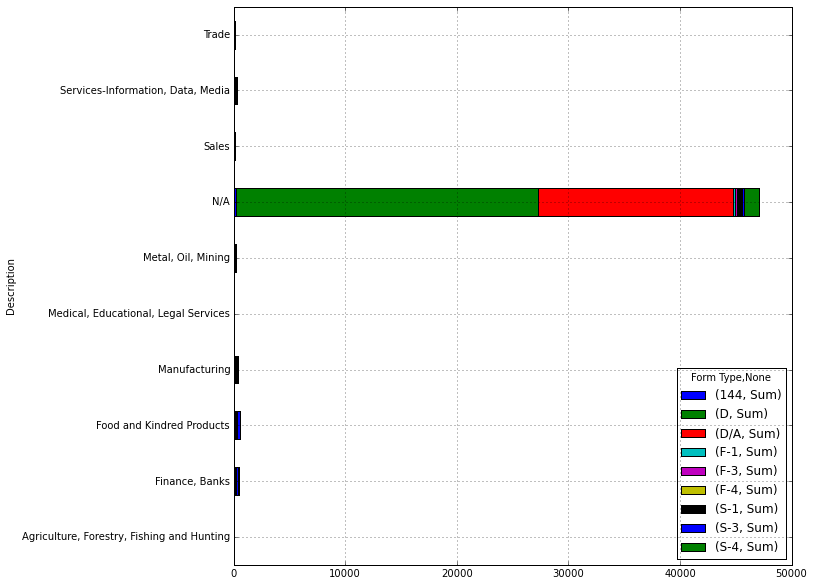

In [36]:
table_sector.plot(kind='barh', stacked=True, subplots=False, sort_columns = True, figsize =(10,10))

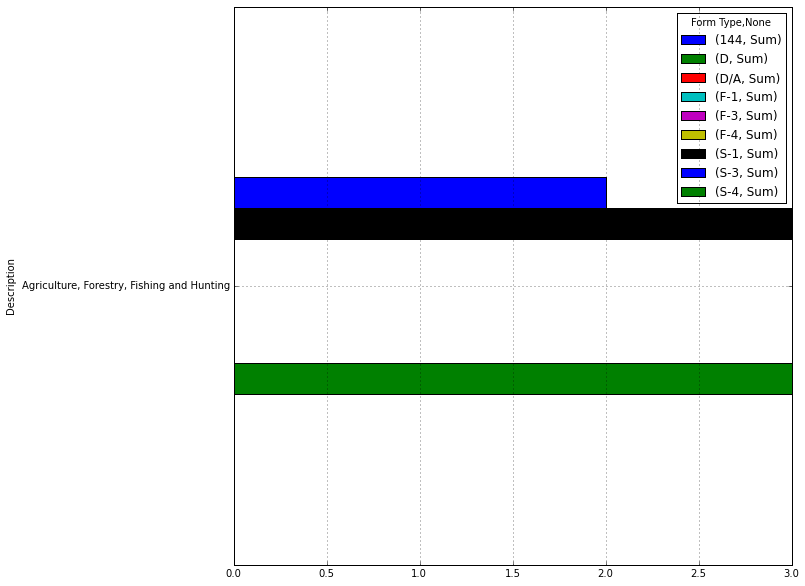

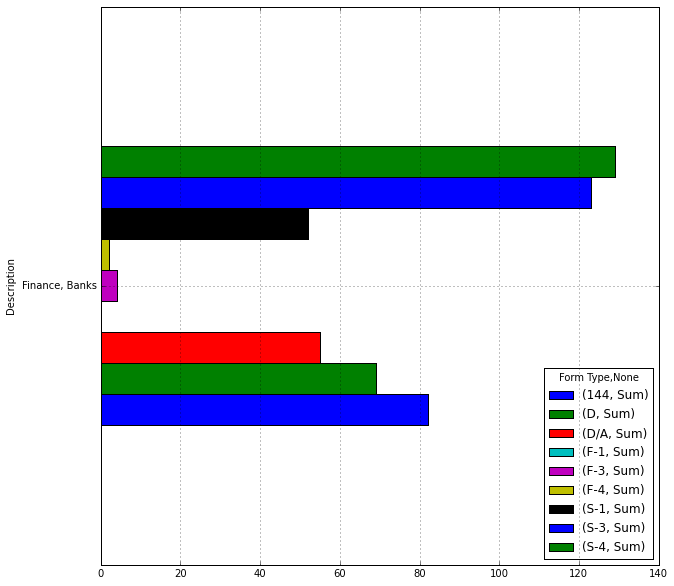

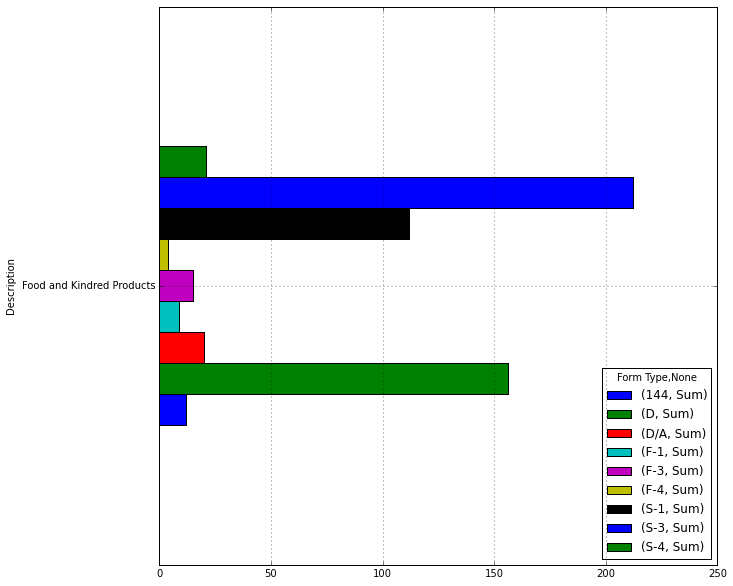

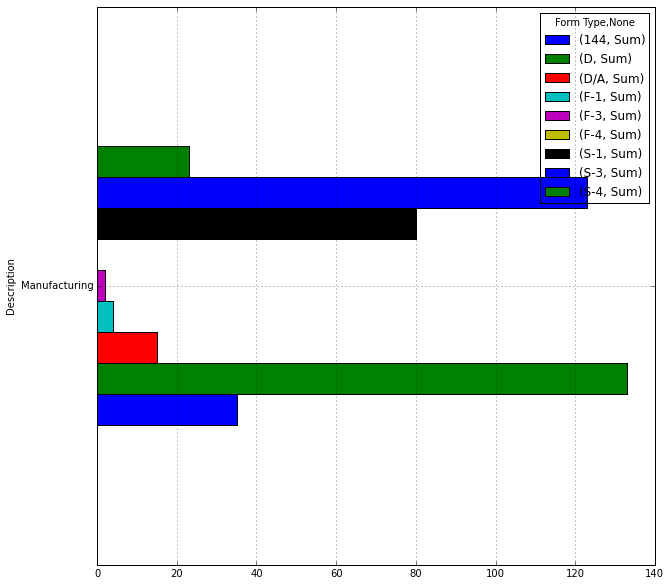

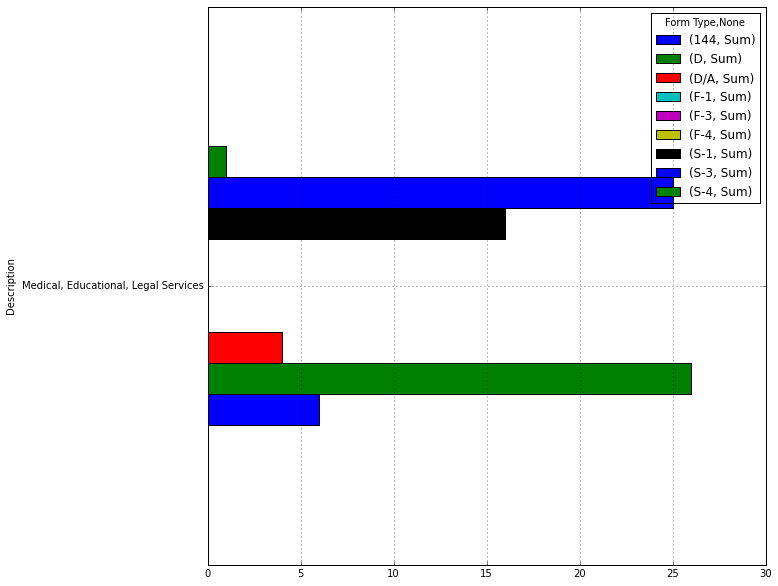

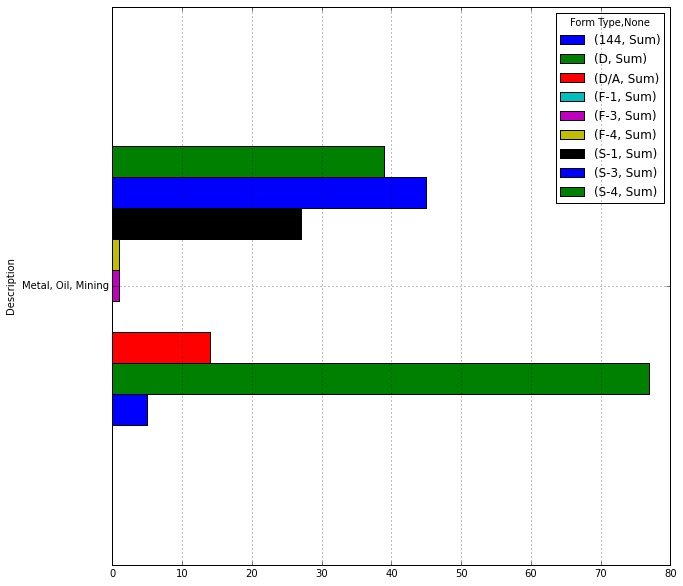

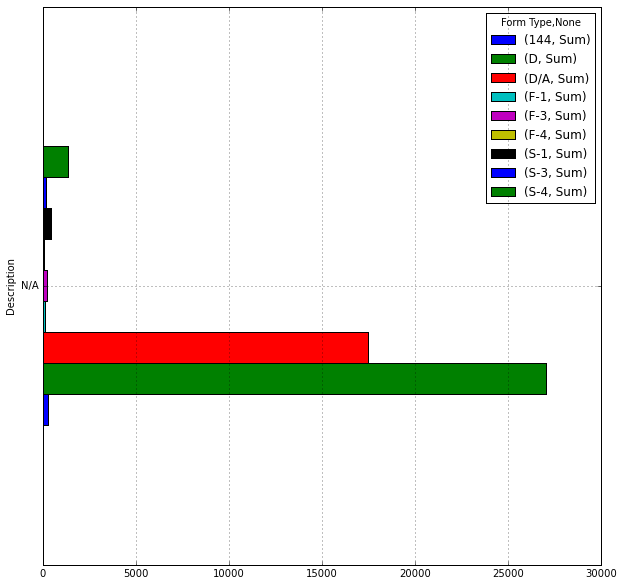

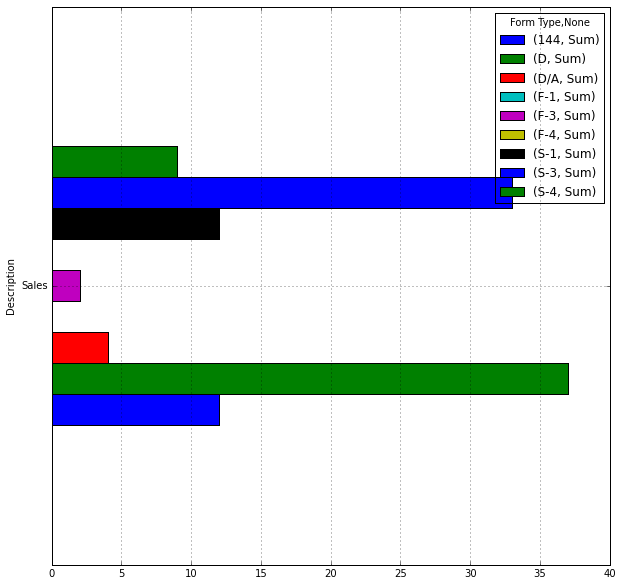

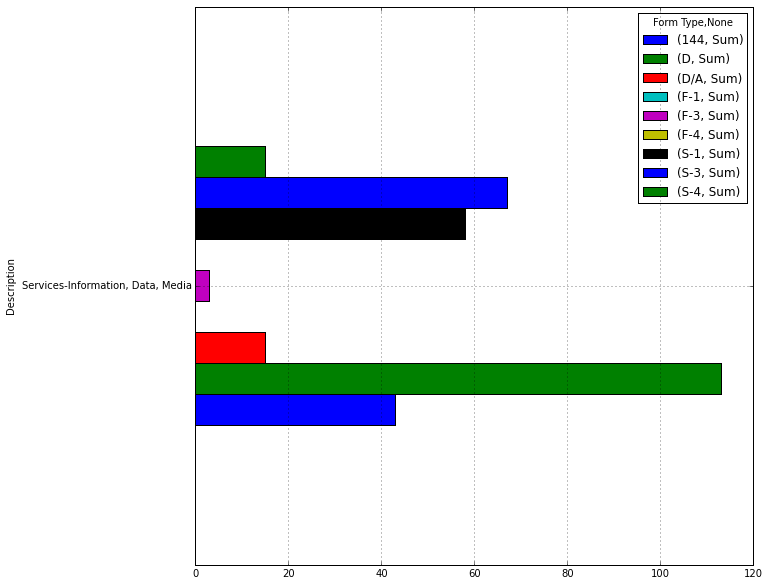

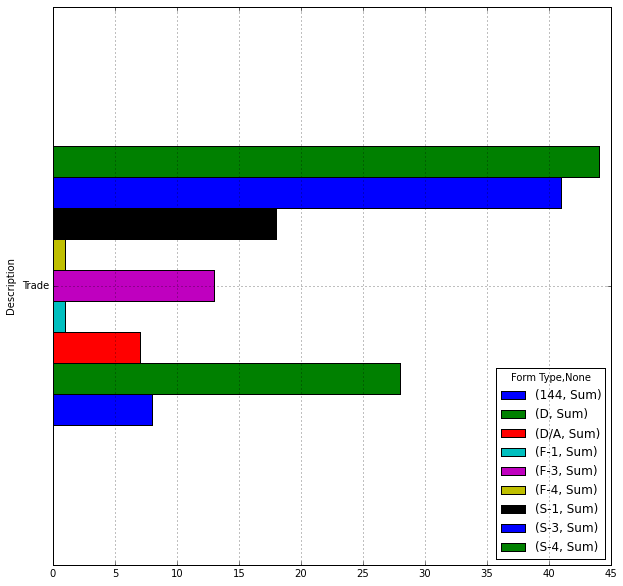

In [37]:
figure1 = table_sector.groupby(level=0).plot(kind='barh', stacked=False, subplots=False, sort_columns = True, figsize =(10,10))